<a href="https://colab.research.google.com/github/M0E313/nlp/blob/main/computer_vision_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights


--2023-05-30 14:24:50--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-05-30 14:24:50 (79.9 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2023-05-30 14:24:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.2MB/s    in 12s     

2023-05-30 14

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!tar -xf VOCtrainval_06-Nov-2007.tar


--2023-05-30 14:25:03--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M   221MB/s    in 2.0s    

2023-05-30 14:25:05 (221 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



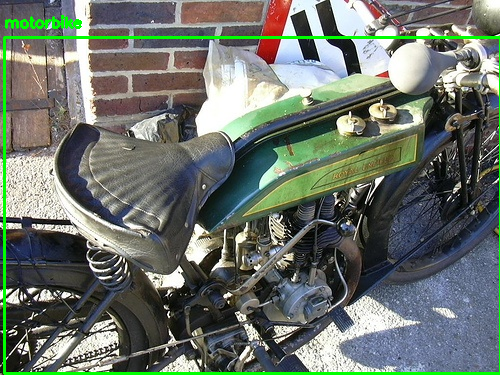

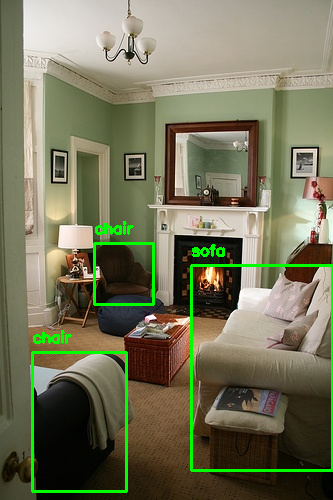

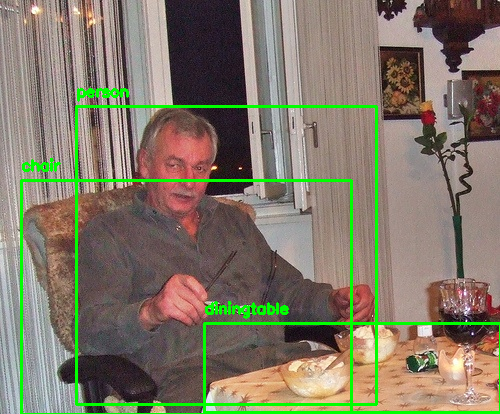

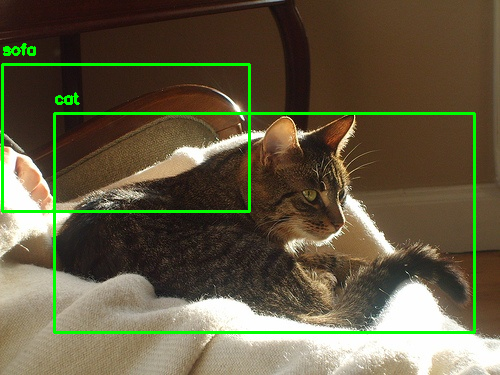

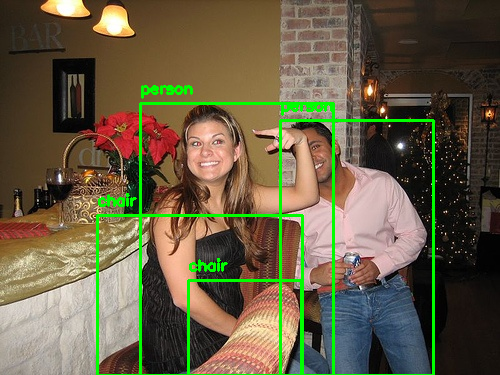

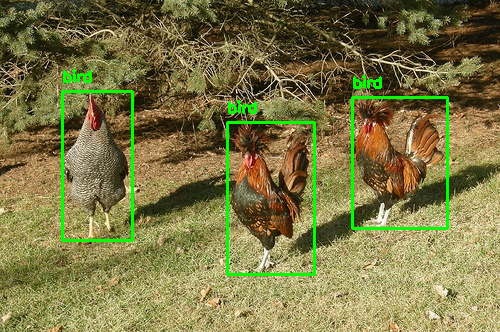

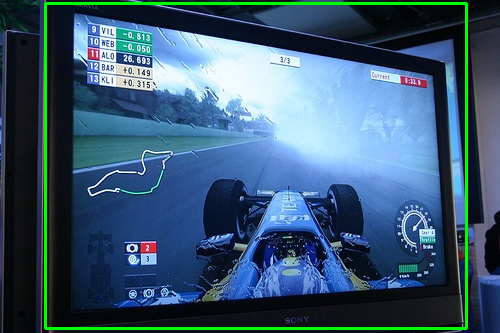

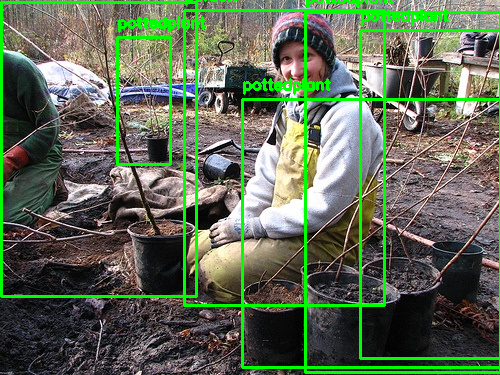

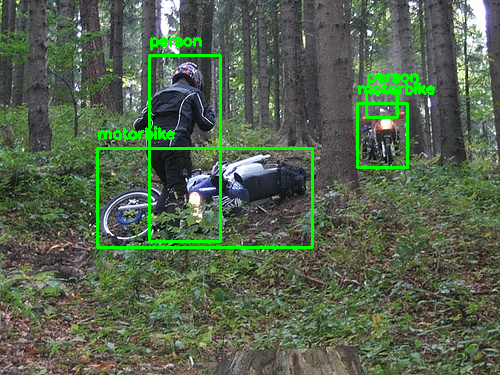

In [ ]:
import cv2
import os
import xml.etree.ElementTree as ET

# Load the pre-trained YOLO model
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

# Define the path to the PASCAL VOC dataset
dataset_path = '/content/VOCdevkit/VOC2007/'

# Load the class labels from the dataset annotations
classes = []
annotation_dir = os.path.join(dataset_path, 'Annotations')
for filename in os.listdir(annotation_dir):
    if filename.endswith('.xml'):
        annotation_path = os.path.join(annotation_dir, filename)
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in classes:
                classes.append(class_name)

# Process each image in the dataset
image_dir = os.path.join(dataset_path, 'JPEGImages')
for filename in os.listdir(image_dir)[:9]:
    if filename.endswith('.jpg'):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        # Load the corresponding annotation
        annotation_path = os.path.join(annotation_dir, filename.replace('.jpg', '.xml'))
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        # Process the annotations and draw bounding boxes
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            class_id = classes.index(class_name)

            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            # Draw the bounding box and label on the image
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the image with bounding boxes and labels
        # cv2_imshow('Object Detection', image)
        cv2_imshow(image)
        cv2.waitKey(0)

cv2.destroyAllWindows()
